In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sweetviz 
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Drop the 'Id' column
df = df.drop('Id', axis=1)
df.shape

(1460, 80)

## Exploring the dependent variable - SalePrice.

In [6]:
# Descriptive statistics for SalePrice
desc_stats = df['SalePrice'].describe()
print("Descriptive Statistics for SalePrice:\n", desc_stats)

Descriptive Statistics for SalePrice:
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


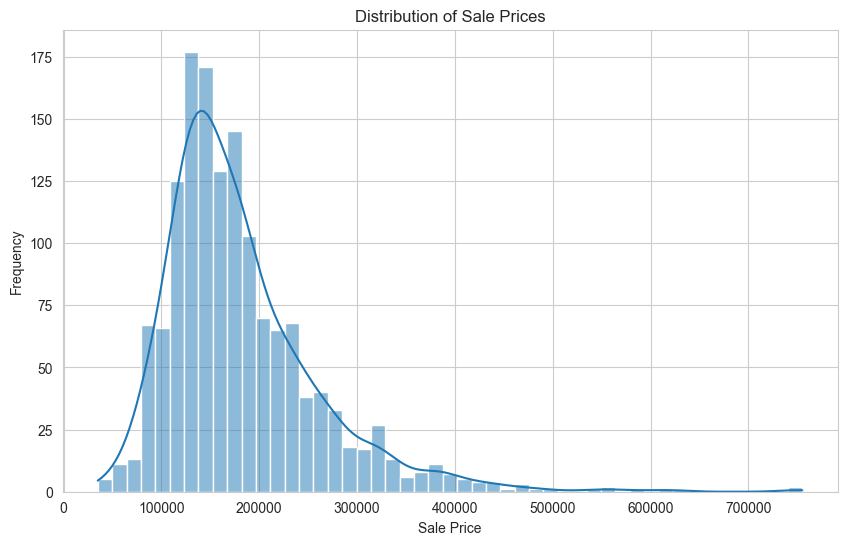

In [7]:
# Histogram with Kernel Density Estimate (KDE) for SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


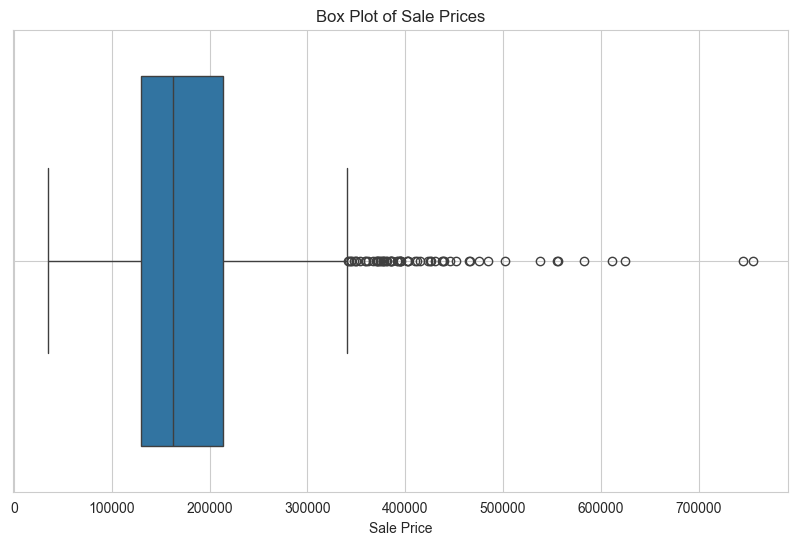

In [8]:
# Box plot for SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.grid(True)
plt.show()

## Investigating the missing data.

In [9]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

print(f"Number of columns with missing values: {len(columns_with_missing_values)}")
print("Names of Columns with Missing Data:\n", columns_with_missing_values)

Number of columns with missing values: 19
Names of Columns with Missing Data:
 ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [10]:
# Calculate percentage of missing values for each column
missing_percentage_dict = {}
for column in columns_with_missing_values:
    missing_count = df[column].isnull().sum()
    total_count = len(df)
    missing_percentage = (missing_count / total_count) * 100
    missing_percentage_dict[column] = missing_percentage

# Sort and print the percentage of missing values in descending order
sorted_missing_percentage = sorted(missing_percentage_dict.items(), key=lambda x: x[1], reverse=True)
for column, missing_percentage in sorted_missing_percentage:
    print(f"Percentage of missing values in {column}: {missing_percentage:.2f}%")

Percentage of missing values in PoolQC: 99.52%
Percentage of missing values in MiscFeature: 96.30%
Percentage of missing values in Alley: 93.77%
Percentage of missing values in Fence: 80.75%
Percentage of missing values in MasVnrType: 59.73%
Percentage of missing values in FireplaceQu: 47.26%
Percentage of missing values in LotFrontage: 17.74%
Percentage of missing values in GarageType: 5.55%
Percentage of missing values in GarageYrBlt: 5.55%
Percentage of missing values in GarageFinish: 5.55%
Percentage of missing values in GarageQual: 5.55%
Percentage of missing values in GarageCond: 5.55%
Percentage of missing values in BsmtExposure: 2.60%
Percentage of missing values in BsmtFinType2: 2.60%
Percentage of missing values in BsmtQual: 2.53%
Percentage of missing values in BsmtCond: 2.53%
Percentage of missing values in BsmtFinType1: 2.53%
Percentage of missing values in MasVnrArea: 0.55%
Percentage of missing values in Electrical: 0.07%


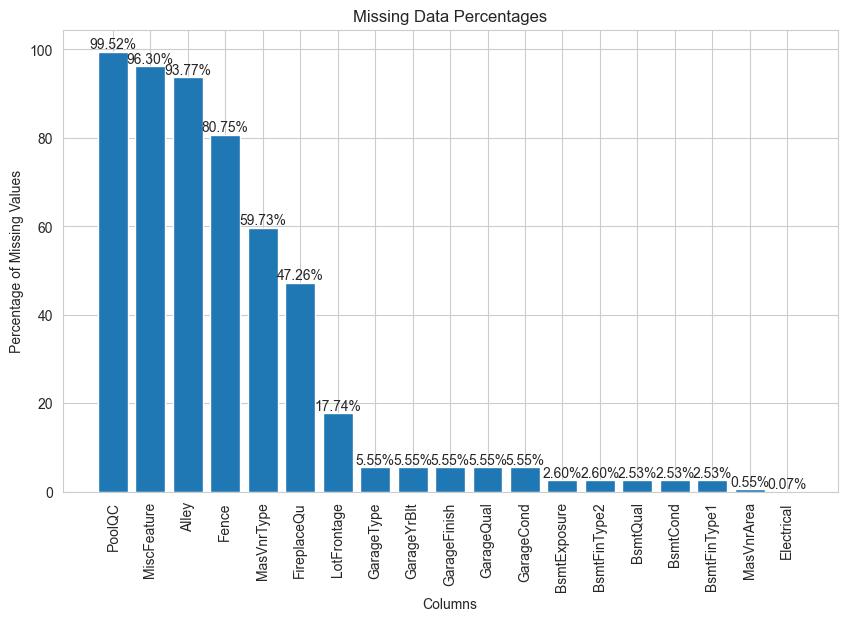

In [11]:
# Segregate the values
sorted_columns = [item[0] for item in sorted_missing_percentage]
sorted_percentages = [item[1] for item in sorted_missing_percentage]

# Plot the sorted missing data percentages
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_percentages)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Data Percentages')
plt.xticks(rotation=90)

# Add data labels to the bar plot
for i, v in enumerate(sorted_percentages):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

plt.show()

In [12]:
# Drop columns with more than 40% missing values
columns_to_drop = [column for column, percentage in missing_percentage_dict.items() if percentage > 40]
df_dropped = df.drop(columns_to_drop, axis=1)

# Impute missing values with the median for numeric columns 
#         and the most frequent value for discrete variables
for column in df_dropped.columns:
    if df_dropped[column].isnull().any():
        if df_dropped[column].dtype != 'object':
            median_value = df_dropped[column].median()
            df_dropped[column].fillna(median_value, inplace=True)
        else:
            most_frequent_value = df_dropped[column].mode()[0]
            df_dropped[column].fillna(most_frequent_value, inplace=True)

# Step 4: Verify the percentage of missing values after dropping and imputing
missing_percentage_dict_after = {}
for column in df_dropped.columns:
    missing_count = df_dropped[column].isnull().sum()
    total_count = len(df_dropped)
    missing_percentage = (missing_count / total_count) * 100
    missing_percentage_dict_after[column] = missing_percentage

# Updating the dataframe
df = df_dropped

# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print(f"Number of columns with missing values: {len(columns_with_missing_values)}")

Number of columns with missing values: 0


## Identifying Most Important Categorical and Numerical Features

In [13]:
# Assuming all the columns with less than 8 unique values are categorical
threshold = 8  # Threshold
categorical_features = []

for column in df.columns:
    if df[column].nunique() <= threshold :
        categorical_features.append(column)

print(f"Number of Categorical Columns: {len(categorical_features)}")
print("Categorical Columns:", categorical_features)

Number of Categorical Columns: 42
Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'YrSold', 'SaleCondition']


In [14]:
# Identifying the categorical variables where the count of records within a category is below 1% of the total number of records

threshold_percent = 1/100.0
columns_with_small_categories = []
columns_with_half_or_less_categories = []

for col in categorical_features:
    value_counts_proportions = df[col].value_counts(normalize=True)
    value_counts_numbers = df[col].value_counts()
    
    small_categories_proportions = value_counts_proportions[value_counts_proportions < threshold_percent]
    
    num_of_total_categories = df[col].nunique()
    num_of_small_categories = len(small_categories_proportions)
    
    num_and_names_of_small_categories = [(cat, value_counts_numbers[cat]) for cat in small_categories_proportions.index]
    
    if num_of_small_categories > 0:
        columns_with_small_categories.append(col)
        print(f"For '{col}', the total number of categories is {num_of_total_categories}, and the categories with less than 1% values are: {num_and_names_of_small_categories}")
        
    # Check if the number of "small" categories is more than half the total number of categories
    if num_of_small_categories >= num_of_total_categories / 2:
        columns_with_half_or_less_categories.append(col)

print(f"The columns that contain categories with less than 1% of values are: {columns_with_small_categories}")
print()
print(f"The columns for which more than half of the categories each have less than 1% values are: {columns_with_half_or_less_categories}")

For 'MSZoning', the total number of categories is 5, and the categories with less than 1% values are: [('C (all)', 10)]
For 'Street', the total number of categories is 2, and the categories with less than 1% values are: [('Grvl', 6)]
For 'LotShape', the total number of categories is 4, and the categories with less than 1% values are: [('IR3', 10)]
For 'Utilities', the total number of categories is 2, and the categories with less than 1% values are: [('NoSeWa', 1)]
For 'LotConfig', the total number of categories is 5, and the categories with less than 1% values are: [('FR3', 4)]
For 'LandSlope', the total number of categories is 3, and the categories with less than 1% values are: [('Sev', 13)]
For 'Condition2', the total number of categories is 8, and the categories with less than 1% values are: [('Feedr', 6), ('Artery', 2), ('RRNn', 2), ('PosN', 2), ('PosA', 1), ('RRAn', 1), ('RRAe', 1)]
For 'HouseStyle', the total number of categories is 8, and the categories with less than 1% values 

In [15]:
# Dropping the categorical variables where the count of records within a category is below 1% of the total number of records, because these features have categories with only one records or so.
categorical_features = [x for x in categorical_features if x not in columns_with_half_or_less_categories]
print(f'Number of Categorical Features: {len(categorical_features)}')

Number of Categorical Features: 32


In [16]:
# Identifying the top ten categorical features with the maximum impact on SalePrice
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = categorical_features
    pvals = []
    for c in categorical_features:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval', ascending=False)

k = anova(df)
top_ten = k.head(10)
print(top_ten)

        features          pval
19  BsmtHalfBath  8.013743e-01
30        YrSold  6.300888e-01
4      LandSlope  1.413964e-01
14  BsmtFinType2  3.599299e-02
24    Functional  4.841697e-04
3      LotConfig  3.163167e-06
8      ExterCond  5.106681e-07
2    LandContour  2.742217e-08
11      BsmtCond  7.166578e-09
5       BldgType  2.056736e-10


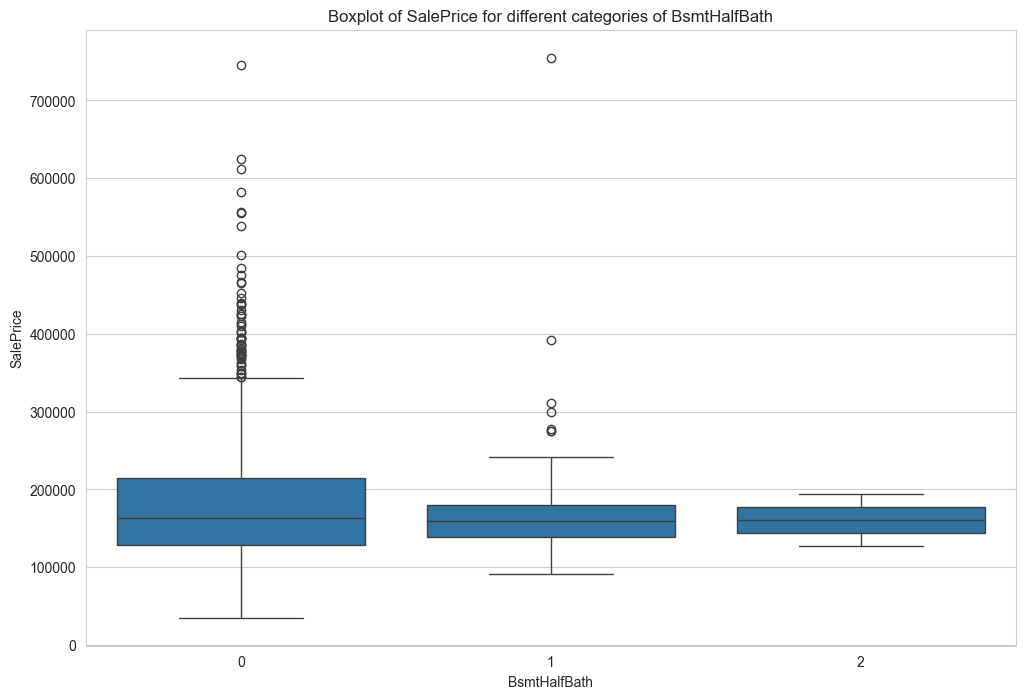

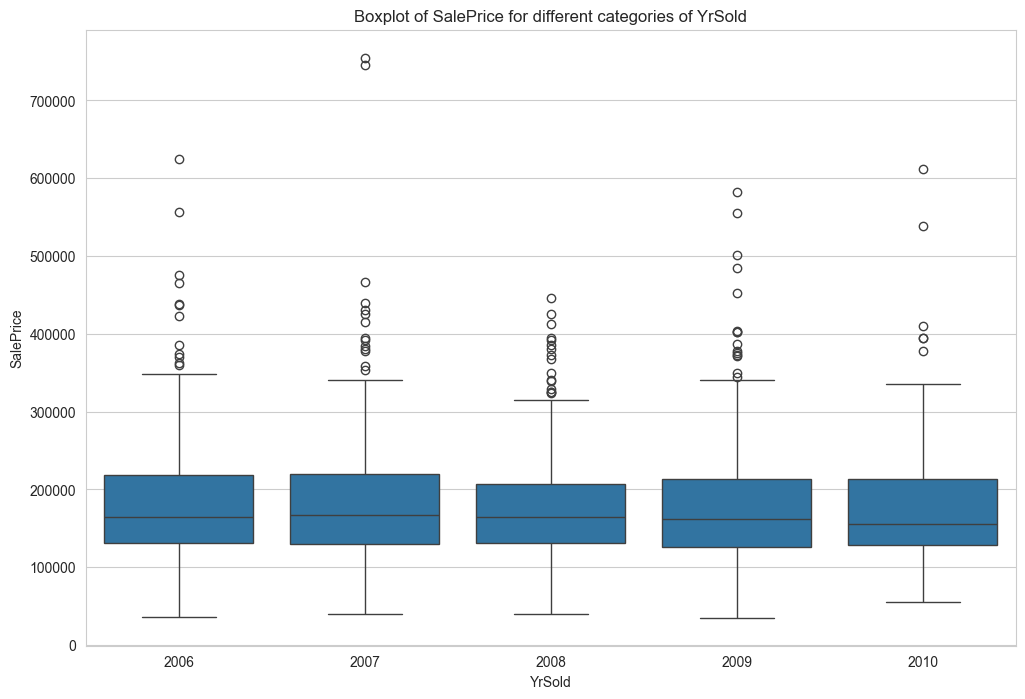

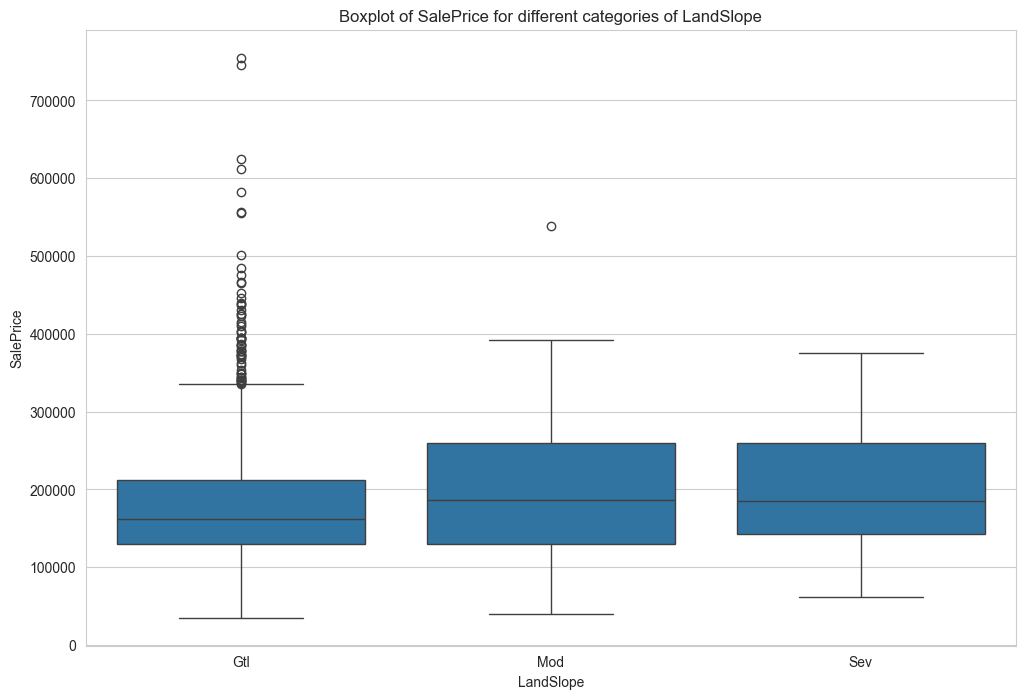

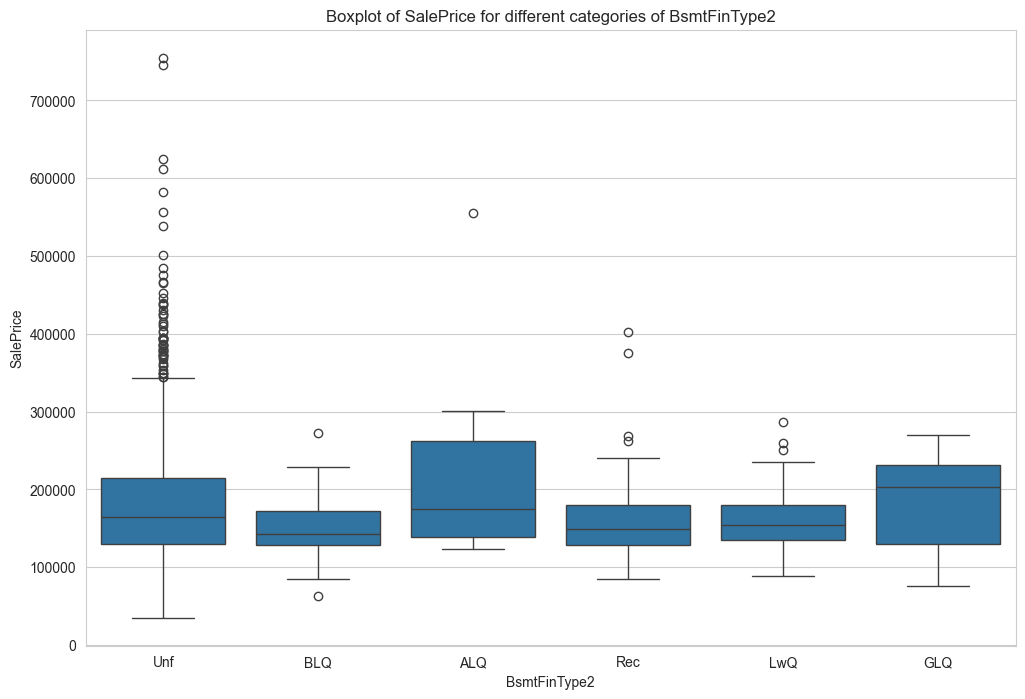

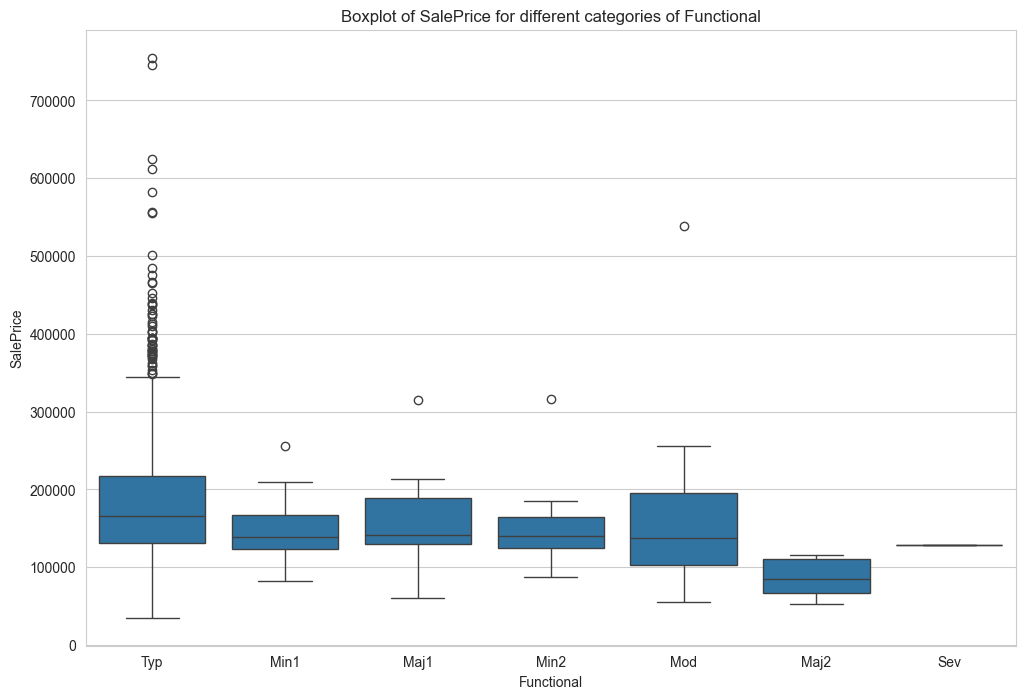

In [17]:
# Exploring the relationship of SalePrice with the top five categorical features
top_5_categorical_features = k.head(5).features.tolist()

for feature in top_5_categorical_features:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=feature, y='SalePrice', data=df)
    plt.title(f'Boxplot of SalePrice for different categories of {feature}')
    plt.show()

In [18]:
# Identify Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [x for x in numerical_features if x not in categorical_features]
numerical_features.remove('SalePrice')
numerical_features.remove('MoSold')
categorical_features.append('MoSold')
print(f'Number of Numerical Features: {len(numerical_features)}')
print(f'Number of Categorical Features: {len(categorical_features)}')

Number of Numerical Features: 27
Number of Categorical Features: 33


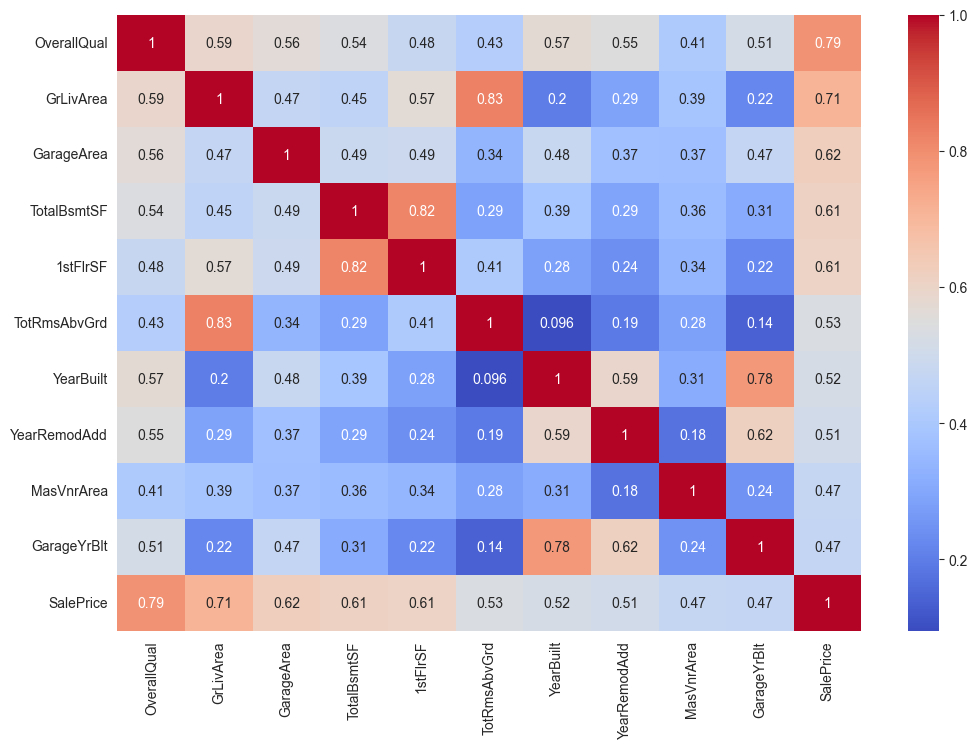

In [19]:
target_variable ='SalePrice'

# Compute correlations
correlations = df[numerical_features + ['SalePrice']].corr()[target_variable]

# Sort by absolute value and take top 10
top_10_numerical_features = correlations.abs().sort_values(ascending=False).head(11).index.tolist()  # We are taking head(11) because 'SalePrice' will also be included

# We remove 'SalePrice' from top_10_numerical_features since it will obviously be perfectly correlated with itself
top_10_numerical_features.remove(target_variable)

# Calculate correlation of top 10 numerical features
top_corr_matrix = df[top_10_numerical_features + [target_variable]].corr()

# Use seaborn to generate a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm')

plt.show()

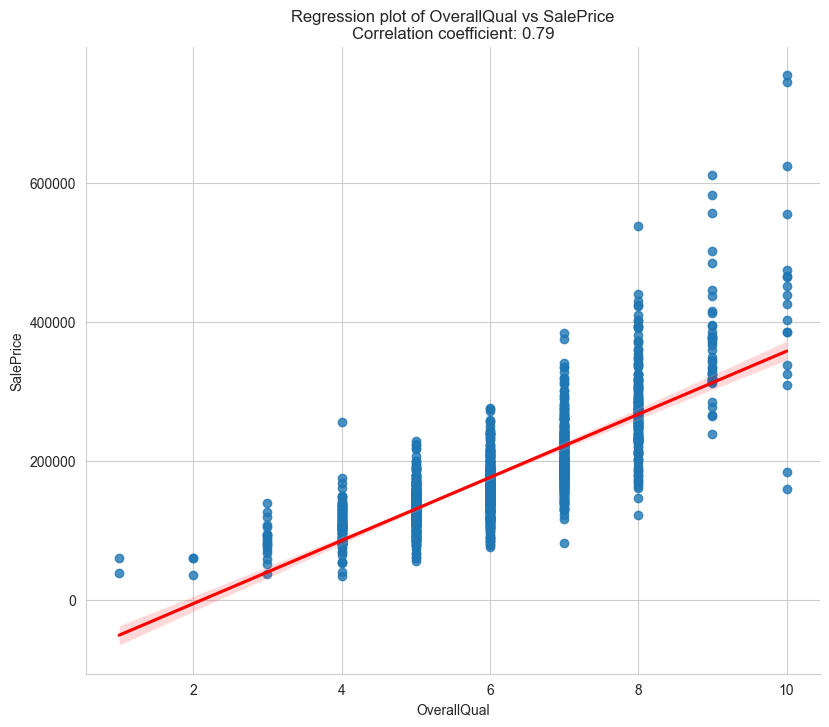

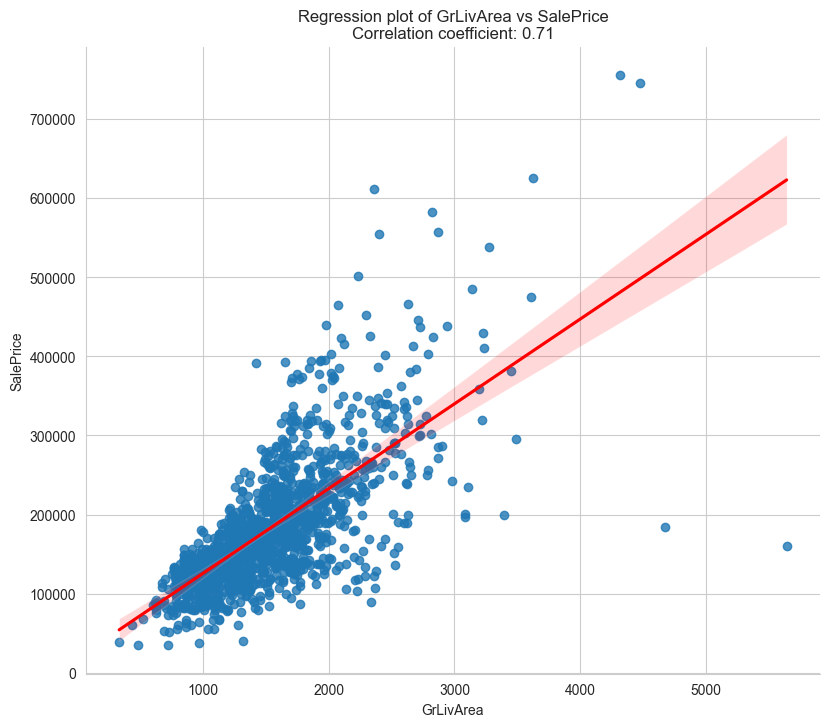

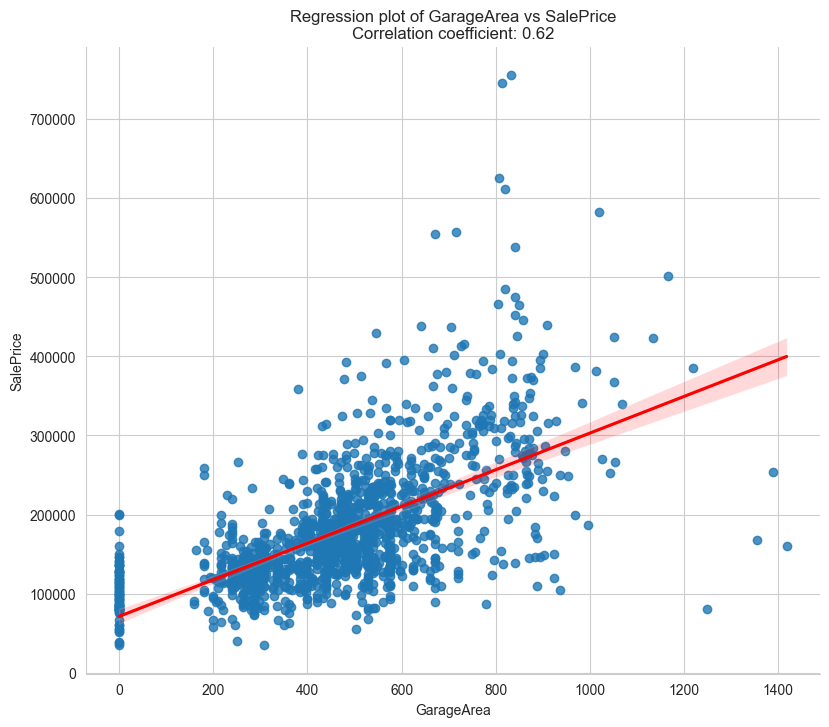

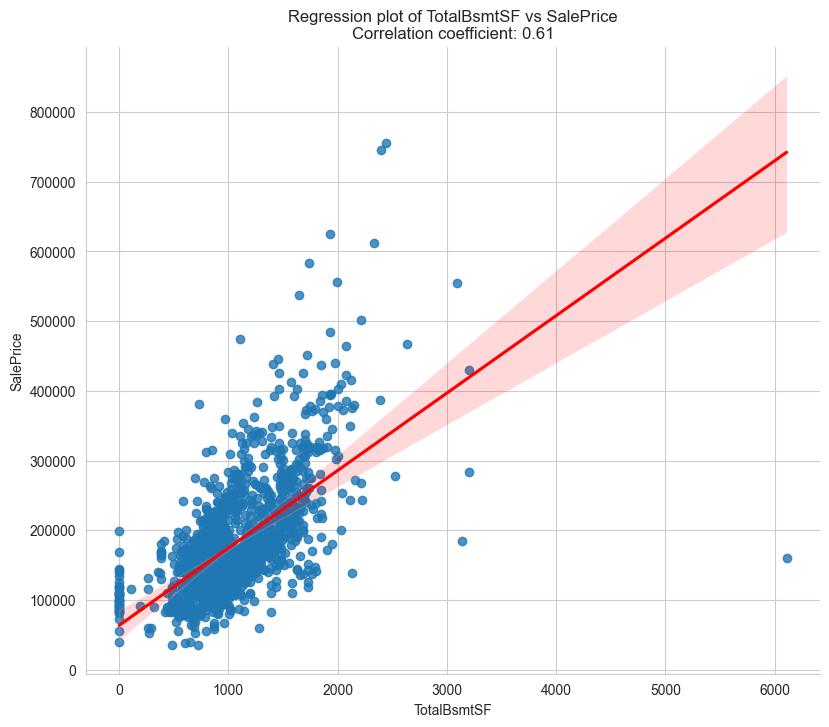

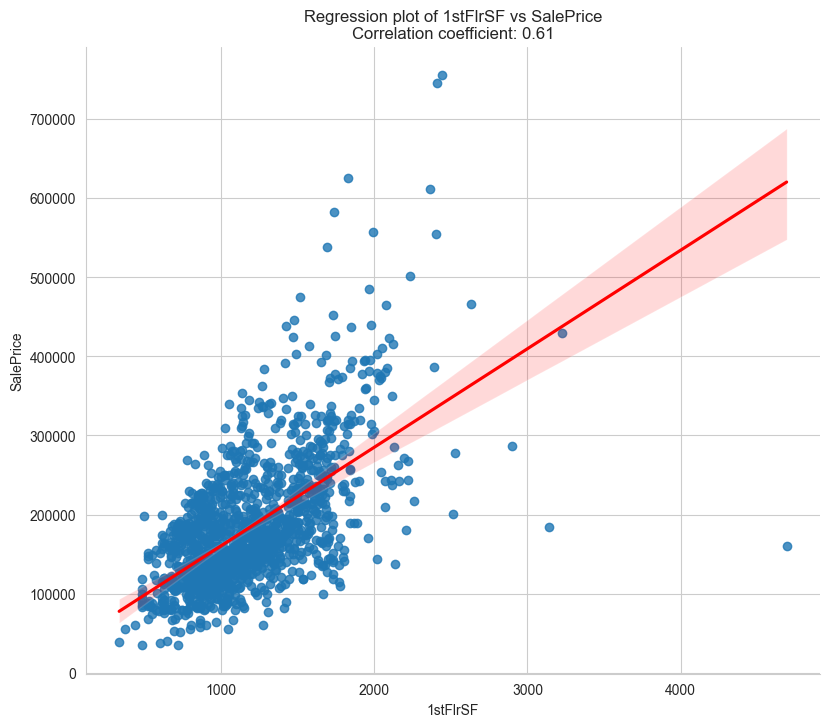

In [20]:
# Plot the Scatter Plots with SalePrice

# Sort by absolute value and take top 5
top_5_numerical_features = correlations.abs().sort_values(ascending=False).head(6).index.tolist()
top_5_numerical_features.remove(target_variable)

# Plot scatter plots with regression line
for feature in top_5_numerical_features:
    # Adjust the height and aspect parameters to your needs
    sns.lmplot(x=feature, y=target_variable, data=df, line_kws={'color': 'red'}, height=7, aspect=1.2)
    plt.title(f'Regression plot of {feature} vs {target_variable}\n'
              f'Correlation coefficient: {pearsonr(df[feature], df[target_variable])[0]:.2f}')
    plt.show()

In [21]:
# Using the library sweetviz to do the Eploratory Data Analysis
eda_report = sweetviz.analyze(df, target_feat ='SalePrice')
eda_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Identify Outliers

In [22]:
# Set the threshold for the number of outliers
outlier_threshold = len(df) * 0.1  # 10% of the length of df

# Identify columns with more than 10% outliers
outlier_features = []
for column in numerical_features:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]
    outliers_count = outliers.shape[0]
    if outliers_count > outlier_threshold:
        outlier_features.append((column, outliers_count))

# Step 3: Print the columns with more than 10% outliers
print("Columns with more than 10% outliers:")
for feature, count in outlier_features:
    print(f"{feature} has {count} outliers.")


Columns with more than 10% outliers:
BsmtFinSF2 has 167 outliers.
EnclosedPorch has 208 outliers.


In [23]:
# Of the 28 numerical features only two features have more than 10% outliers

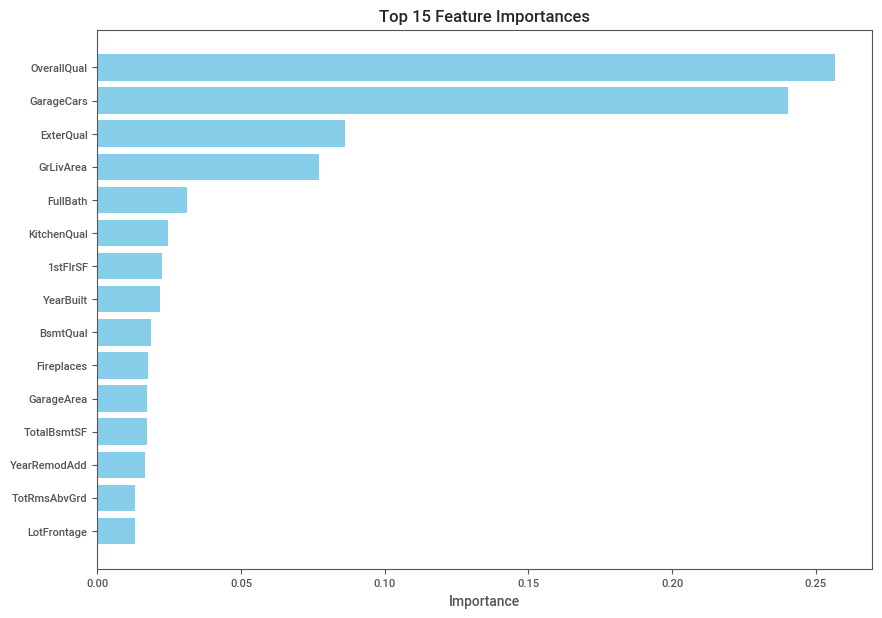

In [24]:
# Apply the Random Forest algorithm to identify the most influential features, encompassing both numerical and categorical variables, that exert the strongest impact on the 'SalePrice.'

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Copy the original DataFrame
df_encoded = df.copy()

# Label encoding for categorical features
le = LabelEncoder()
for feature in categorical_features+numerical_features:
    df_encoded[feature] = le.fit_transform(df_encoded[feature].astype(str))

# Define input and target variables
X = df_encoded[categorical_features + numerical_features]
y = df_encoded[target_variable]


# Fit Random Forest on your dataset
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# get the feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})
top_15_features = feature_importances.sort_values(by="Importance", ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 7))
plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()  # This line is to invert the y-axis to start with the highest value at top
plt.show()


In [25]:
print(numerical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [26]:
print(categorical_features)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive', 'YrSold', 'SaleCondition', 'MoSold']


In [27]:
df.shape

(1460, 74)

#### Consolidating the house size-related features into a single variable, we sum the following attributes: 'GrLivArea' (above-grade living area square feet), '1stFlrSF' (first floor square feet), '2ndFlrSF' (second floor square feet), 'BsmtFinSF1: Type 1 finished square feet', and 'LowQualFinSF' (low-quality finished square feet across all floors). This new aggregated variable represents the total living area of the house in square feet, capturing the comprehensive size across all floors and quality levels.

In [28]:
# Adding the variables
df['TotalSF'] = df['GrLivArea'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['BsmtFinSF1'] + df['LowQualFinSF'] + df['TotalBsmtSF'] + df['BsmtFinSF2'] + df['BsmtUnfSF']


Statistical Summary: TotalSF
count     1460.000000
mean      5145.786301
std       1647.196985
min        668.000000
25%       4028.000000
50%       4958.000000
75%       6017.000000
max      23504.000000
Name: TotalSF, dtype: float64


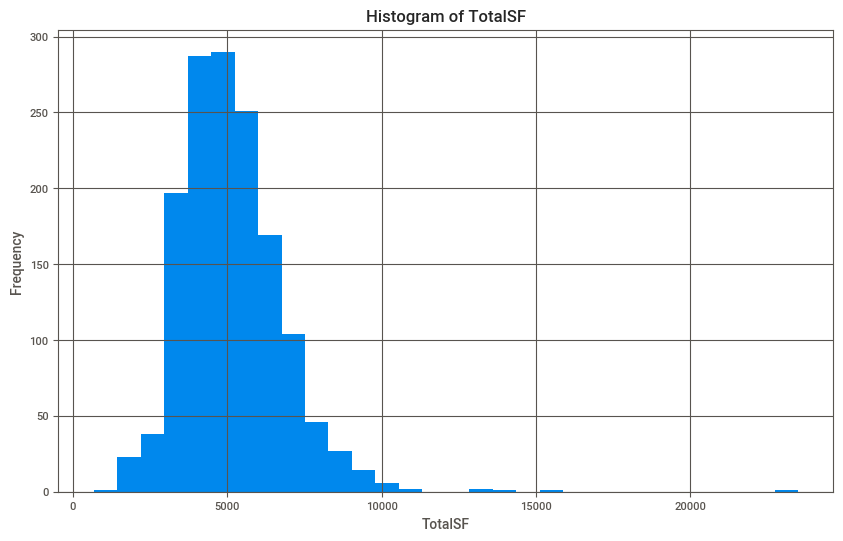

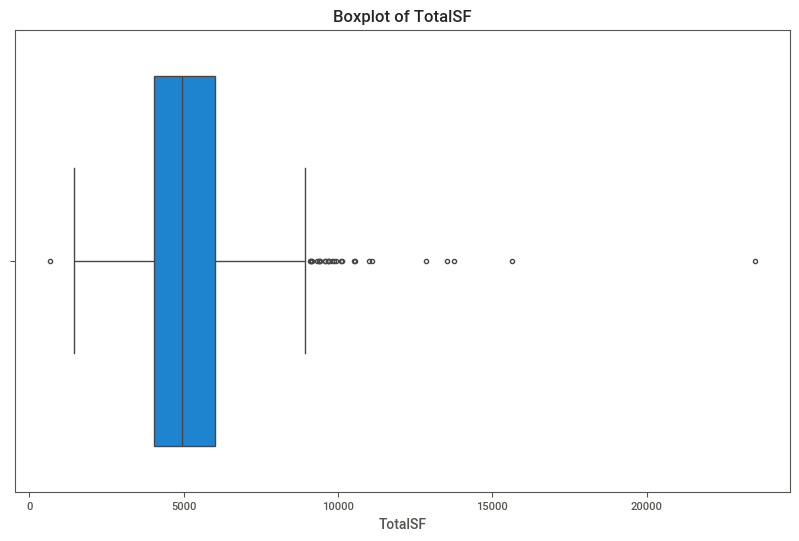

In [29]:
# Exploring TotalSF
print("Statistical Summary:", 'TotalSF')
print(df['TotalSF'].describe())

plt.figure(figsize=(10, 6))
df['TotalSF'].hist(bins=30)
plt.title(f'Histogram of {'TotalSF'}')
plt.xlabel('TotalSF')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TotalSF')
plt.title(f'Boxplot of {'TotalSF'}')
plt.show()

The `TotalSF` variable, representing the total square footage of houses, exhibits a right-skewed distribution with most houses clustered in the moderate square footage range but with a long tail of outliers indicating some houses have significantly larger areas. The median square footage is lower than the mean, which is skewed upwards by these larger properties, and the considerable standard deviation reflects a wide variance in house sizes. The presence of outliers suggests that while `TotalSF` could be a strong predictor for `SalePrice`.

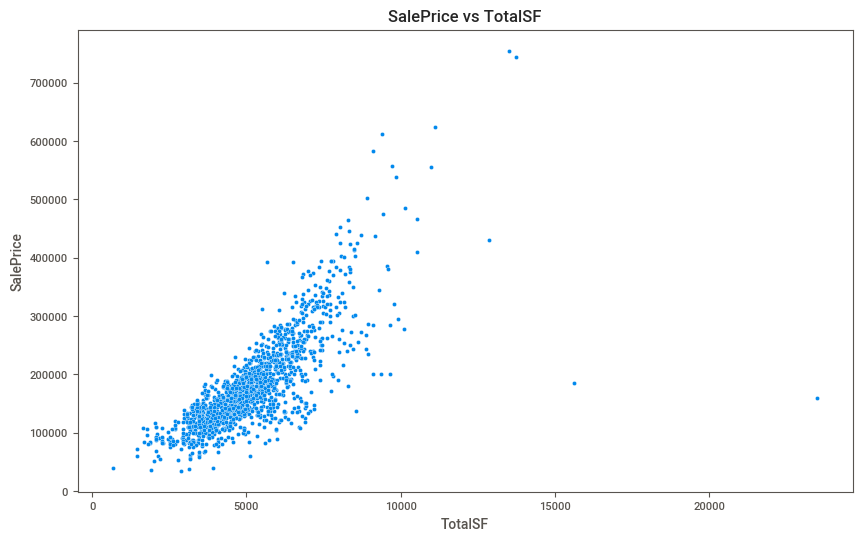

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['TotalSF'], y='SalePrice')
plt.title(f'SalePrice vs TotalSF')
plt.xlabel('TotalSF')
plt.ylabel('SalePrice')
plt.show()

In [31]:
# Creating the final list of features to be included in the model creation
features_to_delete = ['GrLivArea', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'LowQualFinSF', 'TotalBsmtSF', 'BsmtFinSF2', 'BsmtUnfSF']
numerical_features = [x for x in numerical_features if x not in features_to_delete]
numerical_features.append('TotalSF')
print(numerical_features)
print()
print(f"Number of Numerical features: {len(numerical_features)}")

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalSF']

Number of Numerical features: 20


### Consolidating the Porch features into a single variable, we sum the following attributes: ‘WoodDeckSF: Wood deck area in square feet, OpenPorchSF: Open porch area in square feet, EnclosedPorch: Enclosed porch area in square feet, 3SsnPorch: Three season porch area in square feet, and ‘ScreenPorch: Screen porch area in square feet. This new aggregated porch variable represents the total porch area of the house in square feet, capturing the comprehensive size across all floors and quality levels.

In [32]:
df['Porch'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

Statistical Summary: Porch
count     1460.000000
mean      5145.786301
std       1647.196985
min        668.000000
25%       4028.000000
50%       4958.000000
75%       6017.000000
max      23504.000000
Name: TotalSF, dtype: float64


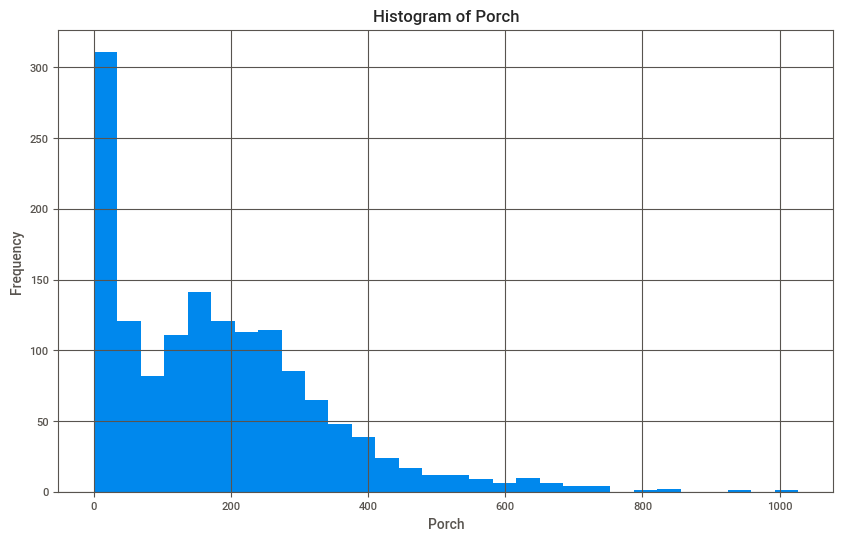

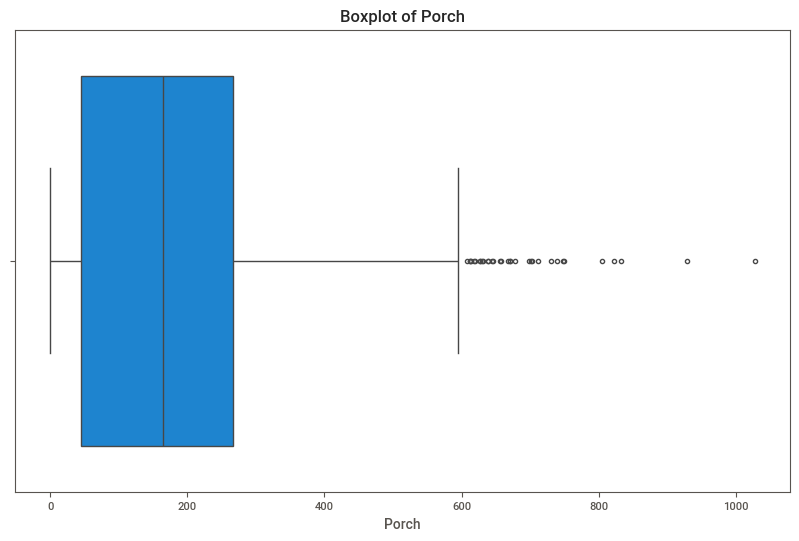

In [33]:
# Exploring TotalSF
print("Statistical Summary:", 'Porch')
print(df['TotalSF'].describe())

plt.figure(figsize=(10, 6))
df['Porch'].hist(bins=30)
plt.title(f'Histogram of {'Porch'}')
plt.xlabel('Porch')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Porch')
plt.title(f'Boxplot of {'Porch'}')
plt.show()

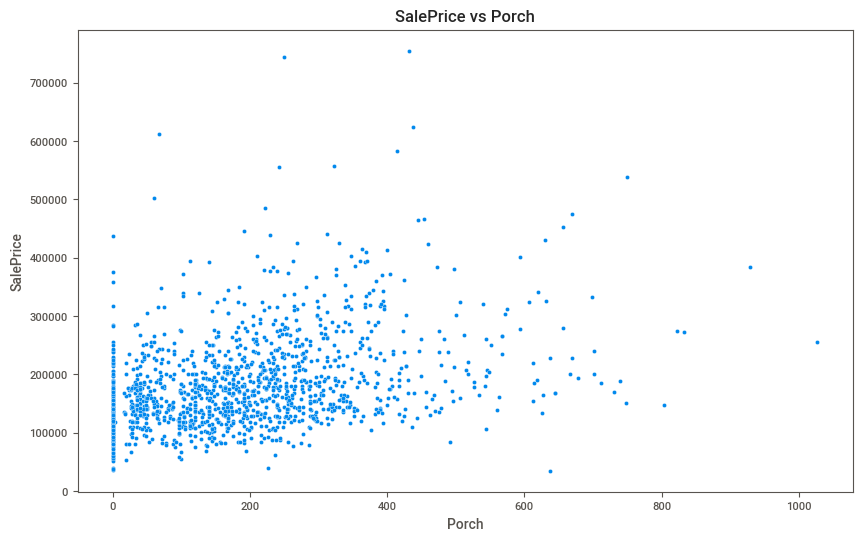

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['Porch'], y='SalePrice')
plt.title(f'SalePrice vs Porch')
plt.xlabel('Porch')
plt.ylabel('SalePrice')
plt.show()

In [35]:
# Creating the final list of features to be included in the model creation
features_to_delete = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
numerical_features = [x for x in numerical_features if x not in features_to_delete]
numerical_features.append('Porch')
print(numerical_features)
print()
print(f"Number of Numerical features: {len(numerical_features)}")

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'PoolArea', 'MiscVal', 'TotalSF', 'Porch']

Number of Numerical features: 16


In [36]:
# Identify highly correlated features

# Calculate correlations between numerical features
correlation_matrix = df[numerical_features].corr()

# Set threshold for high correlation
threshold = 0.65

# Find pairs of highly correlated features
high_corr_pairs = []
correlation_matrix_abs = correlation_matrix.abs()

# Iterate over the columns for upper half of the matrix
for i in range(len(correlation_matrix_abs.columns)):
    for j in range(i+1, len(correlation_matrix_abs.columns)):
        if correlation_matrix_abs.iloc[i, j] >= threshold:
            colname_i = correlation_matrix_abs.columns[i]
            colname_j = correlation_matrix_abs.columns[j]
            high_corr_pairs.append((colname_i, colname_j, correlation_matrix_abs.iloc[i, j]))

print("Highly correlated pairs of numerical features:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]}")

Highly correlated pairs of numerical features:
OverallQual and TotalSF: Correlation = 0.6648302888837496
YearBuilt and GarageYrBlt: Correlation = 0.7771817647425319
TotRmsAbvGrd and TotalSF: Correlation = 0.6788024533202122


In [37]:
# We drop the highly correlated numerical features
numerical_features.remove('TotalSF')
numerical_features.remove('GarageYrBlt')

In [38]:
# Updated list of numerical features
print(numerical_features)
print()
print(f"Number of Numerical features: {len(numerical_features)}")

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'PoolArea', 'MiscVal', 'Porch']

Number of Numerical features: 14


In [39]:
# Updated list of numerical features
print(categorical_features)
print()
print(f"Number of Numerical features: {len(categorical_features)}")

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive', 'YrSold', 'SaleCondition', 'MoSold']

Number of Numerical features: 33


In [40]:
from scipy.stats import chi2_contingency
import itertools

# initialize list of lists 
chi2_check = []

# loop through each pair of categorical features
for column in itertools.combinations(categorical_features, 2):
    # create a contingency table for the pair
    contingency_table = pd.crosstab(df[column[0]], df[column[1]])
    # calculate chi2 test statistic, p-value, degree of freedom and expected values
    chi2, p, dof, ex = chi2_contingency(contingency_table.values)
    chi2_check.append([column[0], column[1], p])

# convert to dataframe
res_chi2 = pd.DataFrame(data = chi2_check, columns=['Feature_A', 'Feature_B', 'P-Value'])

# sort the results by P-Value
res_chi2 = res_chi2.sort_values(by='P-Value', ascending=True)

# get the top ten most correlated categorical features
top_10_corr_cat_features = res_chi2.head(10)
# flatten the pairs to get a list of involved features
flattened_features = top_10_corr_cat_features[['Feature_A', 'Feature_B']].values.flatten()

# count the frequency of each feature
feature_frequency = pd.Series(flattened_features).value_counts()

print("Individual features most involved in correlations:")
print(feature_frequency)

Individual features most involved in correlations:
BsmtQual        4
ExterQual       3
KitchenQual     2
Foundation      2
FullBath        1
BedroomAbvGr    1
BsmtCond        1
Electrical      1
GarageCars      1
LandContour     1
LandSlope       1
HouseStyle      1
HalfBath        1
Name: count, dtype: int64


In [41]:
# Dropping the highly correlated features
features_to_delete = ['BsmtQual', 'ExterQual', 'KitchenQual', 'Foundation']
categorical_features = [x for x in categorical_features if x not in features_to_delete]
print(f'Number of Categorical Features: {len(categorical_features)}')
print()
print(f'Categorical Features are: {categorical_features}')

Number of Categorical Features: 29

Categorical Features are: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive', 'YrSold', 'SaleCondition', 'MoSold']


In [42]:
print(f'Number of Numerical Features: {len(numerical_features)}')
print()
print(f'Numerical Features are: {numerical_features}')

Number of Numerical Features: 14

Numerical Features are: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'PoolArea', 'MiscVal', 'Porch']


In [43]:
# Get a combined list of all numerical and categorical features
all_features = numerical_features + categorical_features
all_features.append(target_variable)

# Find columns to drop - those not in all_features
drop_columns = [col for col in df.columns if col not in all_features]

# Drop these columns from df
df = df.drop(columns=drop_columns)

print(df.head())

   MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope BldgType HouseStyle  ...  GarageCars  GarageArea  PavedDrive  \
0       Gtl     1Fam     2Story  ...           2         548           Y   
1       Gtl     1Fam     1Story  ...           2         460           Y   
2       Gtl     1Fam     2Story  ...           2         608           Y   
3       Gtl     1Fam     2Story  ...           3         642           Y   
4       Gtl     1Fam     2Story  ...           3         836           Y   

   PoolArea  MiscVal MoSold YrSold SaleCondition SalePrice Porch  
0

In [44]:
# Apply one-hot encoding to each column with categorical data in your DataFrame
df_encoded = pd.get_dummies(df, columns=categorical_features)

print(df_encoded.head())


   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  KitchenAbvGr  TotRmsAbvGrd  ...  MoSold_3  \
0          2003       196.0             1             8  ...     False   
1          1976         0.0             1             6  ...     False   
2          2002       162.0             1             6  ...     False   
3          1970         0.0             1             7  ...     False   
4          2000       350.0             1             9  ...     False   

   MoSold_4  MoSold_5  MoSold_6  MoSold_7  MoSold_8  MoSold_9  MoSold_10  \
0     False     False 

In [45]:
# Print all column names
print(df_encoded.columns.tolist())

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'PoolArea', 'MiscVal', 'SalePrice', 'Porch', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'ExterCond_Ex', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposur

In [46]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Separate features and target variable
X = df_encoded.drop([target_variable], axis=1)
y = df_encoded[target_variable]

# Initialize models with their CV-variants
models = {
    'Ridge': make_pipeline(StandardScaler(), RidgeCV(cv=5)),
    'Lasso': make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=0)),
    'ElasticNet': make_pipeline(StandardScaler(), ElasticNetCV(cv=5, random_state=0))
}

# Loop over models
for model_name, model in models.items():
    print(f"Fitting {model_name}...")
    
    # Fit the model
    model.fit(X, y)

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=5)

    # Print cross-validation scores
    print(f"{model_name} Cross-validation scores: ", scores)

Fitting Ridge...
Ridge Cross-validation scores:  [0.84937842 0.77851155 0.8264429  0.83142038 0.72139289]
Fitting Lasso...
Lasso Cross-validation scores:  [0.84404428 0.8091649  0.8238361  0.84208158 0.74285892]
Fitting ElasticNet...
ElasticNet Cross-validation scores:  [0.19384673 0.1835043  0.15939369 0.17324499 0.16379276]


For the Ridge regression, the model had relatively high scores ranging from 0.7213 to 0.8494. This indicates that the model did quite well.
For the Lasso regression, the model also did relatively well with scores ranging from 0.7429 to 0.8440.
For the ElasticNet, the scores were significantly lower than Ridge and Lasso, ranging only from 0.1594 to 0.1938. This indicates that the ElasticNet model did not do as well on your dataset as Ridge and Lasso.

In [47]:
# Load the test data
df_test_raw = pd.read_csv('test.csv')
df_test = df_test_raw.copy()  # Creating a copy to preserve raw data

# Save 'Id'
df_test_id = df_test_raw[['Id']]

# Add the Porch Variable
df_test['Porch'] = df_test['WoodDeckSF'] + df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']

# Add the TotalSF Variable
df_test['TotalSF'] = df_test['GrLivArea'] + df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['BsmtFinSF1'] + df_test['LowQualFinSF'] + df_test['TotalBsmtSF'] + df_test['BsmtFinSF2'] + df_test['BsmtUnfSF']

# Ensures that the test DataFrame has the necessary features for prediction
if target_variable in all_features:
    all_features.remove(target_variable)  # removing target variable from the feature list

df_test = df_test[all_features]

# Test DataFrame also needs to go from categorical to one-hot encoding
# And has the same columns as the training DataFrame
df_test_encoded = pd.get_dummies(df_test, columns=categorical_features)

# Ensure the test DataFrame has the same columns as the training DataFrame
missing_cols = set(df_encoded.columns) - set(df_test_encoded.columns)
for c in missing_cols:
    df_test_encoded[c] = 0
df_test_encoded = df_test_encoded[df_encoded.columns]

# Remove the target_variable if it is still in df_test_encoded
df_test_encoded = df_test_encoded.drop(target_variable, errors='ignore', axis=1)

# Filling NaN values with median of the columns
df_test_encoded = df_test_encoded.fillna(df_test_encoded.median())

# Loop over models
for model_name, model in models.items():
    # Generate predictions
    y_pred = model.predict(df_test_encoded)

    # Create a DataFrame for predictions and add the 'Id' column
    df_pred = pd.DataFrame()
    df_pred['Id'] = df_test_id
    df_pred['SalePrice'] = y_pred

    # Write to a CSV file
    df_pred.to_csv(f'{model_name}_predictions.csv', index=False, header=True, float_format='%.15f')

    # Print a status update
    print(f"{model_name} predictions have been written to {model_name}_predictions.csv")

Ridge predictions have been written to Ridge_predictions.csv
Lasso predictions have been written to Lasso_predictions.csv
ElasticNet predictions have been written to ElasticNet_predictions.csv


In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

# Define a pipeline for Polynomial Lasso Regression and fit to training data
 
model = Pipeline([
  ('poly', PolynomialFeatures(degree=2)),
  ('lasso', Lasso(alpha=1)),
])
model.fit(X, y)

# Generate predictions
y_pred = model.predict(df_test_encoded)

# Create a DataFrame for predictions and add the 'Id' column
df_pred = pd.DataFrame()
df_pred['Id'] = df_test_id
df_pred['SalePrice'] = y_pred

# Write to a CSV file
df_pred.to_csv('lasso_polynomial_predictions.csv', index=False, header=True, float_format='%.15f')

# Print a status update
print("Lasso Polynomial predictions have been written to lasso_polynomial_predictions.csv")

Lasso Polynomial predictions have been written to lasso_polynomial_predictions.csv


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Define the pipeline
pipe = make_pipeline(PolynomialFeatures(), Lasso())

# Define the parameter search range
param_grid = {
    'polynomialfeatures__degree': range(1, 4),  # Trying degrees 1 to 3
    'lasso__alpha': [0.1, 1, 10]   # Trying alpha values 0.1, 1, and 10
}

# Define GridSearchCV object
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the data
grid.fit(X, y)

# Extract the best model
model = grid.best_estimator_

# Generate predictions with the best model
y_pred = model.predict(df_test_encoded)

# Create a DataFrame for predictions and add the 'Id' column
df_pred = pd.DataFrame()
df_pred['Id'] = df_test_id
df_pred['SalePrice'] = y_pred

# Write to a CSV file
df_pred.to_csv('lasso_polynomial_predictions.csv', index=False, header=True, float_format='%.15f')

# Print a status update
print("Lasso Polynomial predictions have been written to lasso_polynomial_predictions.csv")
print('Best parameters found: ', grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Lasso Polynomial predictions have been written to lasso_polynomial_predictions.csv
Best parameters found:  {'lasso__alpha': 10, 'polynomialfeatures__degree': 1}


In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Define the pipeline
pipe = make_pipeline(PolynomialFeatures(), Ridge())

# Define the parameter search range
param_grid = {
    'polynomialfeatures__degree': range(1, 4),  # Trying degrees 1 to 3
    'ridge__alpha': [0.1, 1, 10]   # Trying alpha values 0.1, 1, and 10
}

# Define GridSearchCV object
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the data
grid.fit(X, y)

# Extract the best model
model = grid.best_estimator_

# Generate predictions with the best model
y_pred = model.predict(df_test_encoded)

# Create a DataFrame for predictions and add the 'Id' column
df_pred = pd.DataFrame()
df_pred['Id'] = df_test_id
df_pred['SalePrice'] = y_pred

# Write to a CSV file
df_pred.to_csv('ridge_polynomial_predictions.csv', index=False, header=True, float_format='%.15f')

# Print a status update
print("Ridge Polynomial predictions have been written to ridge_polynomial_predictions.csv")
print('Best parameters found: ', grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Ridge Polynomial predictions have been written to ridge_polynomial_predictions.csv
Best parameters found:  {'polynomialfeatures__degree': 1, 'ridge__alpha': 10}


In [51]:
# Get the coefficients
coefs = model.named_steps['ridge'].coef_

# PolynomialFeatures adds a feature representing bias; if Ridge fits intercept, we drop first coef
if model.named_steps['ridge'].fit_intercept:
    coefs = coefs[1:]  # drop first coef

# Your original feature names are here
feature_names = X.columns

# Create a DataFrame for coefficients
df_coefs = pd.DataFrame(list(zip(feature_names, coefs)), columns=["Feature", "Coefficient"])
df_coefs.sort_values(by="Coefficient", ascending=False, inplace=True)

print(df_coefs[:15])

                   Feature   Coefficient
95              FullBath_3  31702.248257
130           GarageCars_3  20370.951023
116           Fireplaces_2  18947.650530
3              OverallQual  18768.966187
58         BsmtExposure_Gd  14155.390551
145  SaleCondition_Partial  12624.256486
99          BedroomAbvGr_0  10656.732796
33           LandSlope_Mod  10526.154308
100         BedroomAbvGr_1  10258.318080
9             TotRmsAbvGrd   9366.880617
63        BsmtFinType1_GLQ   8986.484357
15             MSZoning_FV   8795.133925
97              HalfBath_1   8434.353113
28       LotConfig_CulDSac   7987.216159
42       HouseStyle_1Story   7832.002663


In [52]:
!jupyter nbconvert --to html House_Pricing_Lasso_Ridge.ipynb

[NbConvertApp] Converting notebook House_Pricing_Lasso_Ridge.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 21 image(s).
[NbConvertApp] Writing 1832033 bytes to House_Pricing_Lasso_Ridge.html
